In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Create a fake data set with slope of 0.5 and y-intercept of 5 with random noise

NumberOfDataPoints = 100
x_data = np.linspace(0.0, 10., NumberOfDataPoints)
Noise = np.random.randn(NumberOfDataPoints)
y_True = 0.5*x_data + 5 + Noise

x_df = pd.DataFrame(data=x_data, columns = ['x'])
y_df = pd.DataFrame(data=y_True, columns = ['y'])
Data = pd.concat([x_df, y_df], axis = 1)

Text(0,0.5,'y')

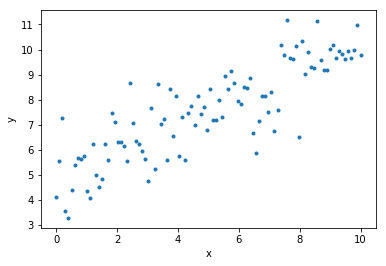

In [3]:
#Plot the points
plt.plot(x_data, y_True, marker = '.', linestyle='None')
plt.xlabel("x")
plt.ylabel("y")

In [4]:
#Create two tensorflow variable placeholders for the data. 
#We will train with batches so the size is the number of batches
Batch_Size = 10

m = tf.Variable(0.52)
b = tf.Variable(30.)

X_Placeholder = tf.placeholder(tf.float32, [Batch_Size])
Y_Placeholder = tf.placeholder(tf.float32, [Batch_Size])

#Creating the linear fit model
Y_Model = m*X_Placeholder + b

#Create the cost function
Error = tf.reduce_sum(tf.square(Y_Placeholder-Y_Model))
#Using a gradient descent optimizer
Optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
#Inputing the cost function into our optimizer
Train = Optimizer.minimize(Error)
#Initializing all the variables
Init = tf.global_variables_initializer()

In [5]:
with tf.Session() as sess:
    sess.run(Init)
    #We will train for 100000 batches
    batches = 100000
    for i in range(batches):
        #Chosing a random subset of data points
        rand_ind = np.random.randint(len(x_data), size=Batch_Size)
        #Creating a dictionary of placeholder-data mappings
        feed = {X_Placeholder: x_data[rand_ind], Y_Placeholder: y_True[rand_ind]}
        #Feeding it into the model
        sess.run(Train, feed_dict = feed)

    #Get our fit slope and y-intercept result
    Model_m, Model_b = sess.run([m, b])

print (Model_m, Model_b)

0.5197975 4.8648043


Text(0,0.5,'y')

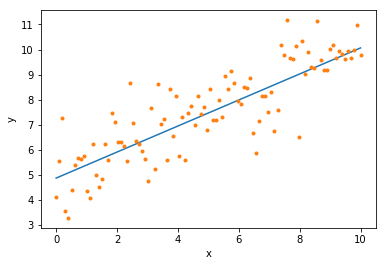

In [6]:
#Plotting the fit line and the data
plt.plot(x_data, Model_m*x_data + Model_b)
plt.plot(x_data, y_True, marker = '.', linestyle='None')
plt.xlabel("x")
plt.ylabel("y")